In [39]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage import morphology

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib.patches as patches


In [15]:
cm = 1/2.54
plt.rcParams['pdf.fonttype'] = 42

In [ ]:
SAMPLES = [f'control_{i}' for i in [1,2,3,4]] + [f'4032_{i}' for i in [1,2,3,4]] + ['4030_1', '4030_2']


In [42]:
offsets_csv = pd.read_csv('../topact-data/kidney-stereoseq/offsets.csv')

offsets = {}

for row in offsets_csv.itertuples():
    offsets[row.sample] = (row.xmin, row.ymin)

In [4]:
def df_to_image(df):
    piv = df.pivot_table(index=['x', 'y'], values = ['MIDCounts'], aggfunc='sum').reset_index()
    
    xmin, xmax, ymin, ymax = piv.x.min(), piv.x.max(), piv.y.min(), piv.y.max()
    
    img = np.zeros((ymax-ymin+1, xmax-xmin+1))
    for row in df.itertuples():
        img[row.y-ymin, row.x-xmin] = row.MIDCounts
        
    return img

In [59]:
def plot_geneimg(smoothed, barloc, cbar=True):
    
    plt.imshow(smoothed.T, origin='lower', cmap='RdYlBu_r', interpolation='None', vmax=2)

    if cbar:
        clb = plt.colorbar(fraction = 0.030)
        clb.set_label('Gene count\n(Smoothed)', loc='center', size=5)
        clb.ax.tick_params(labelsize=5, width=1*cm, length=2)
        clb.outline.set_linewidth(1*cm)
    plt.ylabel('y')
    plt.xlabel('x')


    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    scalebar = AnchoredSizeBar(ax.transData,
                               280, '', barloc,
                               pad=0.1,
                               color='black',
                               size_vertical=10,
                               frameon=False,
                               sep=0,
                               fontproperties=fm.FontProperties(size=5))

    plt.axis('off')
    ax.add_artist(scalebar)

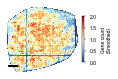

In [66]:
plt.rcParams['figure.figsize'] = (3.5*cm, 3.5*cm)
plt.rcParams["font.family"] = "Arial"

sample = '4032_1'

bg = np.loadtxt(f'../topact-data/kidney-stereoseq/background-images/{sample}_background.txt')

plot_geneimg(bg, 'lower left')

plt.savefig(f'{sample}_bg.pdf', bbox_inches='tight')

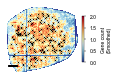

In [67]:
immunes = np.loadtxt(f'../topact-data/kidney-stereoseq/immune-coords/{sample}_immunes.txt')

plot_geneimg(bg, 'lower left')


plt.scatter(x=immunes[:,0], y=immunes[:,1], marker='x', s=3, linewidth=1*cm, color='black')
plt.savefig(f'{sample}_immunes.pdf', bbox_inches='tight')

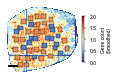

In [68]:
gloms = np.loadtxt(f'../topact-data/kidney-stereoseq/bin20-gloms/{sample}_gloms.txt')
nongloms = np.loadtxt(f'../topact-data/kidney-stereoseq/nonglom-patches/{sample}_nongloms.txt')
xoff, yoff = offsets[sample]

plot_geneimg(bg, 'lower left')
ax = plt.gca()
for x,y in gloms:
    rect = patches.Rectangle((y-75-yoff, x-75-xoff), 150, 150, linewidth=1*cm, edgecolor='black', facecolor='#4878d0', alpha=0.9)
    ax.add_patch(rect)
    
for x,y in nongloms:
    rect = patches.Rectangle((y-75-yoff, x-75-xoff), 150, 150, linewidth=1*cm, edgecolor='black', facecolor='#ee854a', alpha=0.9)
    ax.add_patch(rect)
    
plt.savefig(f'{sample}_patches.pdf', bbox_inches='tight')

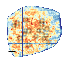

In [69]:
plt.rcParams['figure.figsize'] = (2.5*cm, 2.5*cm)


plot_geneimg(bg, 'lower left', cbar=False)
ax = plt.gca()
for x,y in gloms:
    rect = patches.Rectangle((y-75-yoff, x-75-xoff), 150, 150, linewidth=1*cm, edgecolor='black', facecolor='None', alpha=0.9)
    ax.add_patch(rect)
    
    
plt.savefig(f'{sample}_gloms.pdf', bbox_inches='tight')

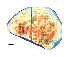

In [70]:
sample = 'control_4'

bg = np.loadtxt(f'../topact-data/kidney-stereoseq/background-images/{sample}_background.txt')

plot_geneimg(bg, 'lower left', cbar=False)
ax = plt.gca()
gloms = np.loadtxt(f'../topact-data/kidney-stereoseq/bin20-gloms/{sample}_gloms.txt')
xoff, yoff = offsets[sample]

for x,y in gloms:
    rect = patches.Rectangle((y-75-yoff, x-75-xoff), 150, 150, linewidth=1*cm, edgecolor='black', facecolor='None', alpha=0.9)
    ax.add_patch(rect)
plt.savefig(f'{sample}_gloms.pdf', bbox_inches='tight')